In [ ]:
'''
talib
'''

In [19]:
import talib
import numpy as np

In [72]:
high = np.array([2.0, 6.0, 2.0, 2.0])
low = np.array([2.0, 5.0, 2.0,  6.0])
close = np.array([2.0, 3.0, 6.0, 2.0, 3.0, 9.0, 2.0, 5.0, 8.0, 9.0, 6.0])
#a = talib.ATR(high, low, close, 2)
a = talib.SMA(close, 6)
print a

[        nan         nan         nan         nan         nan  4.16666667
  4.16666667  4.5         4.83333333  6.          6.5       ]


In [21]:
high = np.array([4561. 4556. 4553. 4556. 4552. 4547. 4544. 4546. 4542. 4544. 4546. 4546.
 4548. 4547. 4546. 4546. 4545. 4547. 4545. 4544. 4544. 4546. 4544. 4544.
 4544. 4545. 4545. 4547. 4549.])
low = np.array([4566. 4562. 4556. 4557. 4556. 4552. 4549. 4548. 4547. 4546. 4546. 4546.
 4548. 4548. 4548. 4547. 4546. 4548. 4547. 4546. 4545. 4546. 4546. 4545.
 4546. 4545. 4546. 4547. 4549.])
close = np.array([4557. 4553. 4551. 4552. 4551. 4545. 4543. 4542. 4542. 4542. 4542. 4545.
 4546. 4545. 4546. 4545. 4543. 4545. 4545. 4544. 4544. 4543. 4544. 4543.
 4543. 4543. 4544. 4544. 4546.])
a = talib.CCI(high, low, close, 2)
a

array([         nan,  66.66666667, -66.66666667,   0.        ])

In [30]:
high = np.array([1.0, 2.0, 6.0, 2.0, 2.0])
low = np.array([1.0, 2.0, 5.0, 2.0,  6.0])
close = np.array([1.0, 2.0, 3.0, 6.0, 2.0])
a = talib.SMA(close, 2)
a

array([ nan,  1.5,  2.5,  4.5,  4. ])

In [29]:
high = np.array([1.0, 2.0, 6.0, 2.0, 2.0])
low = np.array([1.0, 2.0, 5.0, 2.0,  6.0])
close = np.array([1.0, 1.0, 2.0, 3.0, 6.0, 2.0])
a = talib.SMA(close, 2)
a

array([ nan,  1. ,  1.5,  2.5,  4.5,  4. ])

In [ ]:
close = np.array([1000.0, 2.0, 1.0, 6.0, 6.0, 1.0, 6.0, 1.0, 1.0, 1.0, 1.0])
result = talib.RSI(close, 2)
result

In [ ]:
'''
tushare
'''

In [1]:
import tushare as ts
from datetime import datetime, timedelta

In [2]:
df = ts.get_tick_data('rb1805', '2017-09-10')
#df

In [3]:
cons = ts.get_apis()

In [11]:
df = ts.tick('rb1805', conn = cons, date = '2017-11-24', asset = 'X') 
#df = ts.tick('IF1801', conn = cons, date = '2017-06-22', asset = 'X') 
#df = ts.tick('600380', conn = cons, date = '2018-01-02')
#df = ts.tick('rb1806', conn = cons, date = '2018-01-10', asset = 'X')
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            38282, 38283, 38284, 38285, 38286, 38287, 38288, 38289, 38290,
            38291],
           dtype='int64', length=38292)

In [ ]:
lastDt = None
mSecond = 0
for i, row in df.iterrows():
    dt = row['date'].to_datetime()
    if (not lastDt) or lastDt != dt:
        mSecond = 0
        lastDt = dt
    else:
        mSecond += 1
    
    #print mSecond
    dt = dt.replace(microsecond = mSecond)
        
    print dt
    print row['vol']
    print '\n'

In [ ]:
for i, row in df.iterrows():
    print row['date'], '*'*2, row['vol']

In [ ]:
df = ts.bar('rb1805', conn = cons, freq = 'D', start_date = '2017-01-01', end_date = '', asset = 'X')

In [ ]:
df.sort_index(inplace = True)
df

In [ ]:
a = df.ix[1]
the = a['date']
dt = the.to_datetime()
print dt
if dt.time() >= datetime.time(21, 0):
    dt = dt - timedelta(1)

print dt

In [ ]:
for index, row in df.iterrows():
    print row['date'], ' '*2, row['vol']

In [ ]:
from datetime import datetime

In [ ]:
from collections import namedtuple
abc = namedtuple('xyz', ['x', 'y'])
the = abc(6,2)
the.x

In [ ]:
import sys
#sys.getdefaultencoding()
#reload(sys)
#sys.setdefaultencoding('UTF-8')
a = sys.getdefaultencoding()
type(a)

In [ ]:
if isinstance('a', str):
    print 1
else:
    print 2

In [ ]:
'''
pymongo
'''

In [2]:
import pymongo
from vnpy.trader.app.ctaStrategy.ctaBase import TICK_DB_NAME
from datetime import datetime

In [5]:
client = pymongo.MongoClient('localhost', 27017)
db = client[TICK_DB_NAME]
collection = db['rb1810']
collection.create_index('datetime')

#data ={'testId':2, 'testData':'a'}
#collection.update_many({'testId': 1}, {'$set': data}, upsert = True)
startDatetime = datetime.strptime('2018-04-20 22:58:23', '%Y-%m-%d %H:%M:%S')
endDatetime = datetime.strptime('2018-04-21 23:01:06', '%Y-%m-%d %H:%M:%S')
flt = {'datetime':{'$gte':startDatetime,
                   '$lt':endDatetime}}
cursor = collection.find(flt)
    
for tick in cursor:
    print tick['datetime'], '*last*', tick['lastPrice'], '*bid1*', tick['bidPrice1'], '*bid1Size*', tick['bidVolume1'], '*ask1*', tick['askPrice1'], '*ask1Size*', tick['askVolume1']


2018-04-20 22:58:23 *last* 3453.0 *bid1* 3452.0 *bid1Size* 665 *ask1* 3453.0 *ask1Size* 19
2018-04-20 22:58:23.500000 *last* 3453.0 *bid1* 3452.0 *bid1Size* 663 *ask1* 3453.0 *ask1Size* 4
2018-04-20 22:58:24 *last* 3453.0 *bid1* 3452.0 *bid1Size* 644 *ask1* 3453.0 *ask1Size* 90
2018-04-20 22:58:24.500000 *last* 3453.0 *bid1* 3452.0 *bid1Size* 645 *ask1* 3453.0 *ask1Size* 69
2018-04-20 22:58:25 *last* 3452.0 *bid1* 3452.0 *bid1Size* 650 *ask1* 3453.0 *ask1Size* 56
2018-04-20 22:58:25.500000 *last* 3453.0 *bid1* 3452.0 *bid1Size* 653 *ask1* 3453.0 *ask1Size* 57
2018-04-20 22:58:26 *last* 3452.0 *bid1* 3452.0 *bid1Size* 635 *ask1* 3453.0 *ask1Size* 49
2018-04-20 22:58:26.500000 *last* 3453.0 *bid1* 3452.0 *bid1Size* 634 *ask1* 3453.0 *ask1Size* 43
2018-04-20 22:58:27 *last* 3453.0 *bid1* 3452.0 *bid1Size* 609 *ask1* 3453.0 *ask1Size* 51
2018-04-20 22:58:27.500000 *last* 3453.0 *bid1* 3453.0 *bid1Size* 238 *ask1* 3454.0 *ask1Size* 265
2018-04-20 22:58:28 *last* 3454.0 *bid1* 3453.0 *bid1Si

In [14]:
collection.delete_many({'testId':2})

In [27]:
cursor = collection.find({'testId':1})
if cursor.count():
    print 'yes'
else:
    print 'no'

no


In [ ]:
'''
datetime
'''

In [1]:
from datetime import datetime, time, timedelta

In [2]:
a = datetime.now()
b = a + timedelta(1)
print a
print b

2018-03-19 23:30:32.308000
2018-03-20 23:30:32.308000


In [ ]:
a = False
if not a:
    print 'yes'

In [ ]:
'''
json
'''
import json

In [ ]:
f1 = open(filePath)
the = json.load(f1)
for dic in the:
    print dic['a']

In [ ]:
import os

In [ ]:
currentFolder = os.getcwd()
print currentFolder
newPath = os.path.join(currentFolder, '')

In [ ]:
d = datetime.now().strftime('Y-m-d')
d

In [ ]:
'''
pandas
'''

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [ ]:
b = DataFrame()
b['名称'] = []
b['价格'] = []
b['开盘价'] = []
b.ix['2017-01-01'] = [1,2,3]
b.ix['2017-01-02'] = [1,2,3]
b.ix['2017-01-03'] = [1,2,3]
b

In [ ]:
c = DataFrame()
c['名称'] = []
c['价格'] = []
c['开盘价'] = []
c.ix['2017-01-04'] = [1,2,3]
c.ix['2017-01-05'] = [1,2,3]
c.ix['2017-01-06'] = [1,2,3]
c

In [ ]:
the = c.copy()
for index in b.index:
    if index not in c.index:
        c.ix[index] = 0

for index in the.index:
    if index not in b.index:
        b.ix[index] = 0

print b
print '\n'
print c

In [ ]:
d = b + c
d = d.dropna()
d

In [ ]:
fileName = 'abc.csv'

In [ ]:
b.to_csv(fileName, encoding = 'utf-8')

In [ ]:
c = pd.read_csv(fileName, encoding = 'utf-8')
c

In [ ]:
'''
csv
'''

In [ ]:
import csv
import codecs

In [ ]:
fileName = 'abc.csv'

In [ ]:
# 写
f = file(fileName, 'wb')
f.write(codecs.BOM_UTF8)

fieldnames = [u'a', 'last_name']
writer = csv.DictWriter(f, fieldnames=fieldnames)

writer.writeheader()
writer.writerow({'a': '和', 'last_name': '啊'})

In [ ]:
# 读
with open(fileName) as f:
    reader = csv.DictReader(f)
    the = []
    for row in reader:
        the.append(row)
    print the

In [ ]:
'''
os
'''

In [ ]:
import os

In [ ]:
exists = os.path.exists(fileName)
print exists
print os.getcwd()
newFileName = os.getcwd() + '\clone\\abc.csv'
print newFileName
print os.path.exists(newFileName)

In [ ]:
dic = {'a':1, 'b':2, 'c':3}
print dic.keys()
print type(dic.keys())

In [ ]:
walkingDic = 'C:\\Users'
for root, subdirs, files in os.walk(walkingDic):
    for sub in subdirs:
        if sub == 'stgEarningCSV':
            print root

In [ ]:
'''
MongoDB
'''

In [5]:
import pymongo
from datetime import datetime
from vnpy.trader.app.ctaStrategy.ctaBase import TICK_DB_NAME
from copy import copy
from time import time

In [10]:
code = 'rb00.TB'
#code = 'i00.TB'
startDate = datetime.strptime('2017-06-27 22:29:00', '%Y-%m-%d %H:%M:%S')
endDate = datetime.strptime('2015-06-06 23:59:00', '%Y-%m-%d %H:%M:%S')
client = pymongo.MongoClient('localhost', 27017)
db = client['VnTrader_29Min_Db']
#db = client['VnTrader_Tick_Db']
collection = db[code]
collection.create_index('datetime')
#flt = {'datetime':{'$gte':startDate, '$lt':endDate}} 
flt = {'datetime':{'$gte':startDate}} 
data = collection.find(flt).sort('datetime')

start = time()
for dic in data:
    print dic['datetime']
print data.count()
print time() - start


2017-06-27 22:29:00
2017-06-27 22:58:00
2017-06-28 09:00:00
2017-06-28 09:29:00
2017-06-28 09:58:00
2017-06-28 10:58:00
2017-06-28 11:29:00
2017-06-28 13:58:00
2017-06-28 14:29:00
2017-06-28 14:58:00
2017-06-28 21:29:00
11
0.0169999599457


In [32]:
a = datetime.now()
b = str(a)
print b
print type(b)

2018-03-19 21:19:27.438000
<type 'str'>


In [6]:
code = 'rb00.TB'
startDate = datetime.strptime('2015-09-21 21:00:00', '%Y-%m-%d %H:%M:%S')
endDate = datetime.strptime('2015-09-21 21:00:02', '%Y-%m-%d %H:%M:%S')
client = pymongo.MongoClient('localhost', 27017)
collection = client[TICK_DB_NAME][code]
flt = {'datetime':{'$gte':startDate,
                   '$lt':endDate}}        
data = collection.find(flt).sort('datetime')
for dic in data:
    print dic['datetime']
    print dic['lastPrice']
    print '\n'

2015-09-21 21:00:00.500000
1906.0


2015-09-21 21:00:01
1907.0


2015-09-21 21:00:01.500000
1906.0




In [2]:
from datetime import datetime
day = '20111101'
time = '90000500000'
dayTime = day + ' ' + time
dt = datetime.strptime(dayTime, '%Y%m%d %H%M%S%f')
print dt

2011-11-01 09:00:00.500000


In [ ]:
'''
threading
'''

In [6]:
from time import ctime, sleep
import threading

In [40]:
class MyThread(threading.Thread):
    def __init__(self, func, args = ()):
        super(MyThread, self).__init__()
        self.func = func
        self.args = args
    
    def run(self):
        self.result = self.func(*self.args)
    
    
    def get_result(self):
        try:
            return self.result
        except Exception:
            return None
        

In [36]:
def action(arg):
    print 'arg:', arg
    sleep(6)
    print 'abc:', arg
    return arg

tList =  []
dfList = []
for i in range(2):
    t = MyThread(action, args = (str(i)))
    tList.append(t)
    t.start()
    
for t in tList:
    print 'abcxyz'
    dfList.append(t.get_result())
    t.join()

print '='*20
print dfList, '\n'

NameError: name 'MyThread' is not defined

In [39]:
threads = []
t1 = threading.Thread(target = action, args = ('x'))
threads.append(t1)
t1.start()

t2 = threading.Thread(target = action, args = ('y'))
threads.append(t2)
t2.start()

for t in threads:
    #t.setDaemon(True)
    #t.start()
    t.join()
print 'main'

arg: x
arg: y
abc: xabc:
 y
main


In [ ]:
'''
datetime
'''

In [11]:
from datetime import datetime, time, timedelta

In [14]:
nowTime = datetime.now().time()
startMinute = nowTime.minute
startHour = nowTime.hour
startMinute += 1
if startMinute >= 60:
    startMinute = 0
    startHour += 1
        
endMinute = startMinute + 1
endHour =  startHour
if endMinute >= 60:
    endMinute = 0
    endHour += 1
        
startTime = nowTime.replace(hour=startHour, minute=startMinute)
endTime = nowTime.replace(hour=endHour, minute=endMinute)

print nowTime
print startTime
print endTime

09:31:49.402000
09:32:49.402000
09:33:49.402000


In [1]:
from datetime import datetime

In [8]:
timeStr = '113000500'
the = datetime.strptime(timeStr, '%H%M%S%f')
time = the.strftime('%H:%M:%S.%f')

dateStr = '20170511'

the = datetime.strptime(dateStr + ' ' + time, '%Y%m%d %H:%M:%S.%f')
print the

2017-05-11 11:30:00.500000


In [5]:
from datetime import time

In [7]:
a = time(6, 6, 6)
print time

<type 'datetime.time'>


In [ ]:
'''
str
'''

In [4]:
a = '.abc.index'
if a.endswith('.index'):
    print a
else:
    print 'no'

.abc.index


In [12]:
b = a.index('.')
b

0

In [19]:
import datetime

In [8]:
timeStr = '1000000'
theLen = len(timeStr)
if theLen < 9:
    sub = 9 - theLen
    timeStr = '0'*sub + timeStr
tickTime = datetime.datetime.strptime(timeStr, '%H%M%S%f').time()
print tickTime

00:10:00


In [1]:
timeStr = '210060000'
hour = timeStr[0:2]
minute = timeStr[2:4]
second = timeStr[4:6]
microSecond = timeStr[6:9]
print hour
print minute
print second
print microSecond

21
00
60
000


In [31]:
kLine =  2
barDbName = 'VnTrader_%ldMin_Db' % kLine
print barDbName

VnTrader_2Min_Db


In [75]:
a = [1, 2, 3]
b = [4, 5, 6]
data = [a, b]
for x, y, z in data:
    print x, y, z

1 2 3
4 5 6


In [ ]:
'''
os
'''

In [8]:
import os

In [12]:
#a = os.path.dirname("C:\\Users")
a = os.listdir("C:\\Users") 
print a

['All Users', 'Default', 'Default User', 'desktop.ini', 'Public', 'Rachel']


In [13]:
import multiprocessing
import threading
from time import sleep

In [40]:
def action():
    sleep(2)
    print 'start'

In [47]:
#另开线程进行盈亏记录操作
a = 'xyz'
newThread = threading.Thread(target = action, args=())
#开启线程守护（当主线程挂起时，无论子线程有没有执行完都会随主线程挂起）
#newThread.setDaemon(True)
newThread.start()
newThread.join()
print 'yes'

start
yes


In [29]:
t1 = threading.Thread(target = action, args = ('x'))
t1.start()

x


In [ ]:
'''
daily data
'''

In [69]:
from vnpy.trader.app.ctaStrategy.ctaBase import DAILY_DB_NAME
import pymongo

In [70]:
client = pymongo.MongoClient('localhost', 27017)
db = client[DAILY_DB_NAME]
collection = db['cu1807.TB']
collection.create_index('datetime')
cursor = collection.find({})
count = 0
# 每手数量
size = 5
# 拿到历史记录
for dic in cursor:
    openPrice = dic['open']
    closePrice = dic['close']
    priceChange = float(closePrice) - float(openPrice)
    buyChange = dic['buyInterestChange']
    sellChange = dic['sellInterestChange']
    direction = 0
    if buyChange > sellChange:
        direction = 1
        directionStr = u'多'
    elif buyChange < sellChange:
        direction = -1
        directionStr = u'空'
    print dic['datetime'], dic['vtSymbol'], u'开盘', openPrice, u'收盘', closePrice
    #print u'涨跌', priceChange, u'多头增减', buyChange, u'空头增减', sellChange, directionStr, u'盈亏', priceChange * direction, 'x', size, '=', priceChange * direction * size
    #print '\n'
    count += 1
print u'数据量 ', count

2017-07-18 00:00:00 cu1807 开盘 49810 收盘 49480
2017-07-19 00:00:00 cu1807 开盘 49600 收盘 49660
2017-07-20 00:00:00 cu1807 开盘 49650 收盘 49580
2017-07-21 00:00:00 cu1807 开盘 49480 收盘 49650
2017-07-24 00:00:00 cu1807 开盘 49620 收盘 49550
2017-07-25 00:00:00 cu1807 开盘 49650 收盘 50550
2017-07-26 00:00:00 cu1807 开盘 50880 收盘 52150
2017-07-27 00:00:00 cu1807 开盘 52120 收盘 51920
2017-07-28 00:00:00 cu1807 开盘 52120 收盘 51800
2017-07-31 00:00:00 cu1807 开盘 51800 收盘 52540
2017-08-01 00:00:00 cu1807 开盘 52270 收盘 52110
2017-08-02 00:00:00 cu1807 开盘 52170 收盘 51910
2017-08-03 00:00:00 cu1807 开盘 51990 收盘 51750
2017-08-04 00:00:00 cu1807 开盘 51980 收盘 52170
2017-08-07 00:00:00 cu1807 开盘 52170 收盘 52130
2017-08-08 00:00:00 cu1807 开盘 52300 收盘 52180
2017-08-09 00:00:00 cu1807 开盘 52270 收盘 52950
2017-08-10 00:00:00 cu1807 开盘 52850 收盘 52450
2017-08-11 00:00:00 cu1807 开盘 52280 收盘 51650
2017-08-14 00:00:00 cu1807 开盘 51980 收盘 51760
2017-08-15 00:00:00 cu1807 开盘 51900 收盘 51990
2017-08-16 00:00:00 cu1807 开盘 51980 收盘 51860
2017-08-17

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime

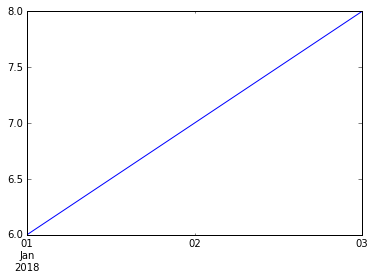

In [63]:
date1 = datetime.strptime('2018-01-01', '%Y-%m-%d')
date2 = datetime.strptime('2018-01-02', '%Y-%m-%d')
date3 = datetime.strptime('2018-01-03', '%Y-%m-%d')
dateList = [date1, date2, date3]
earnList = [6, 7, 8]
dic = {'a':earnList}
df = pd.DataFrame.from_dict(dic)
df.index = dateList
df['a'].plot()

In [2]:
from datetime import datetime

In [ ]:
a = datetime.strptime('2016',)